## <center>HEART ATTACK PREDICTION USING PYTHON


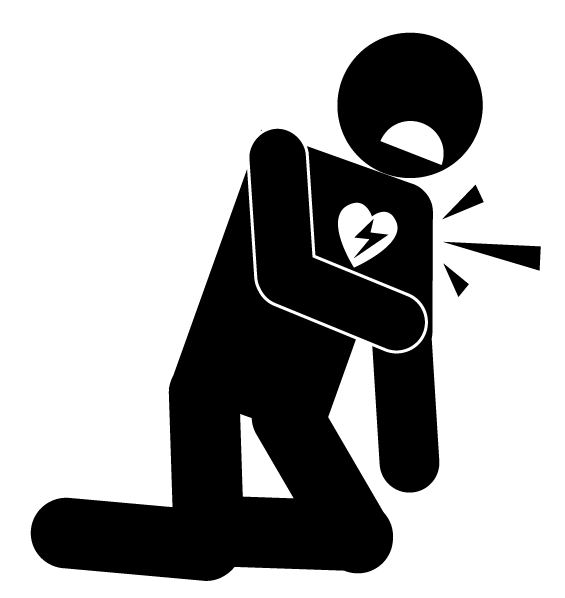

#### About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
data = pd.read_csv('./heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
data.isnull().mean()*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [7]:
data.duplicated().mean()*100

0.33003300330033003

In [8]:
data.drop_duplicates(inplace=True)

## EDA
#### UNI VARIATE ANALYSIS

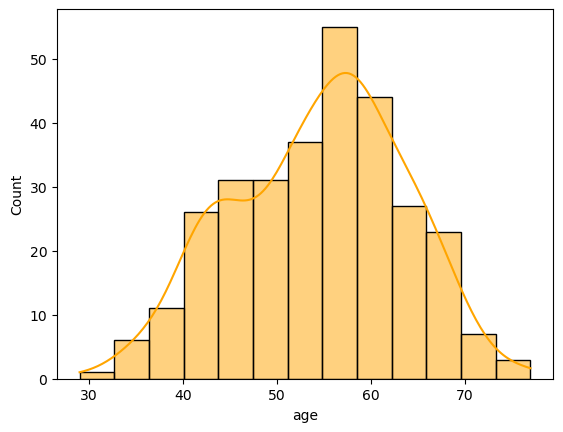

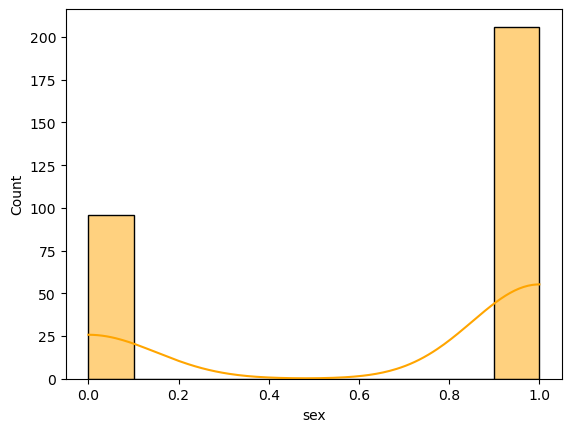

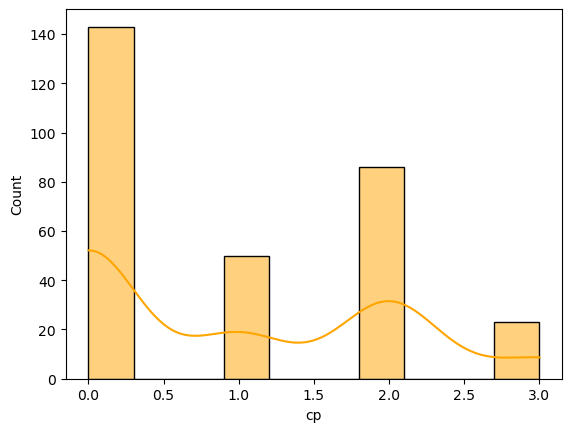

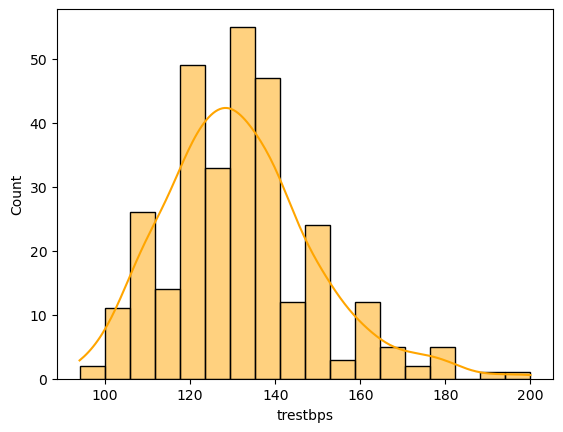

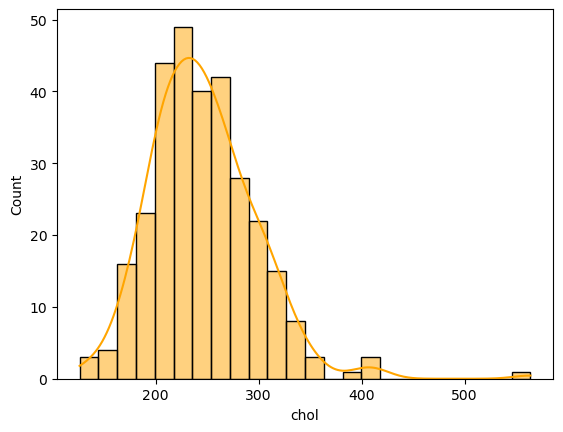

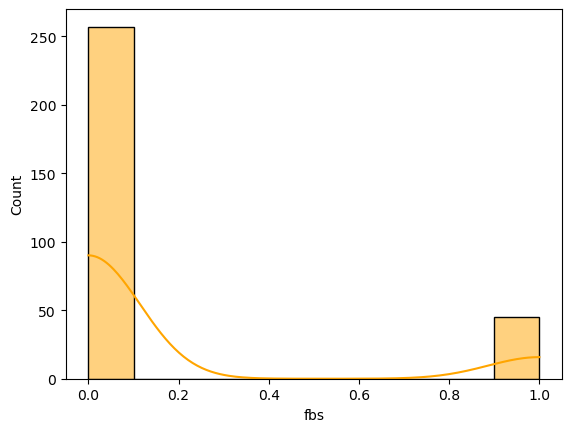

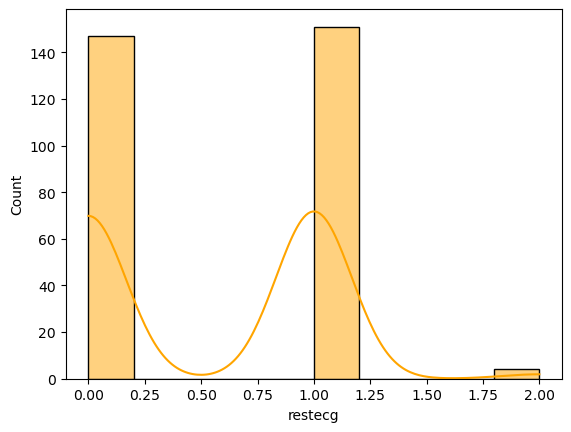

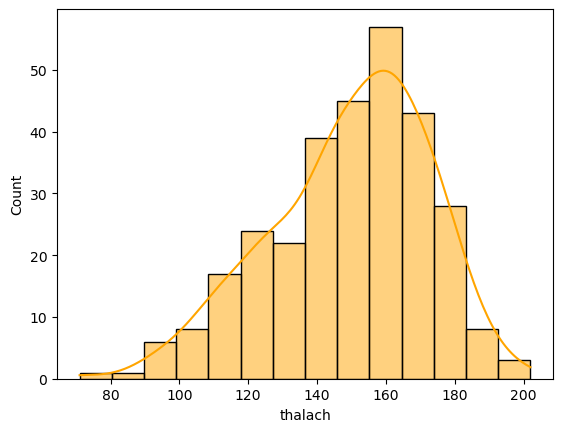

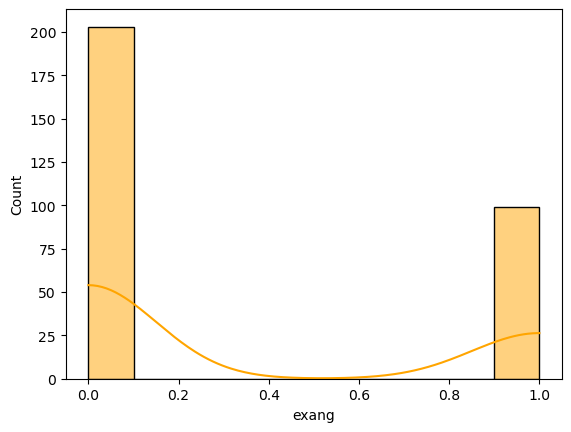

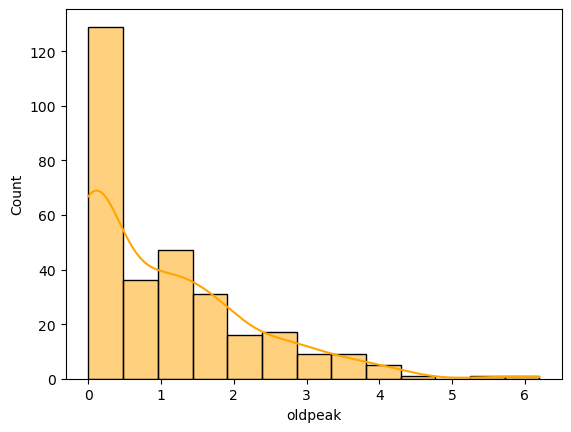

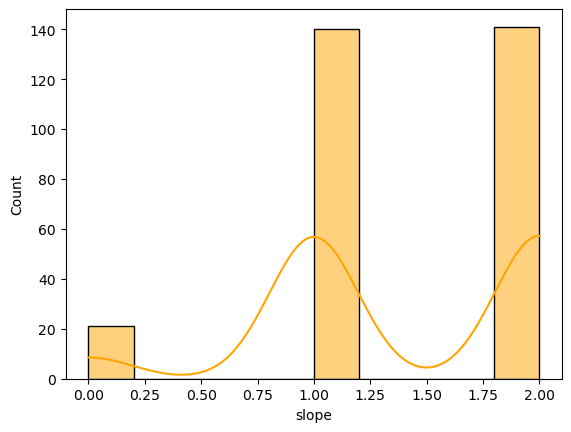

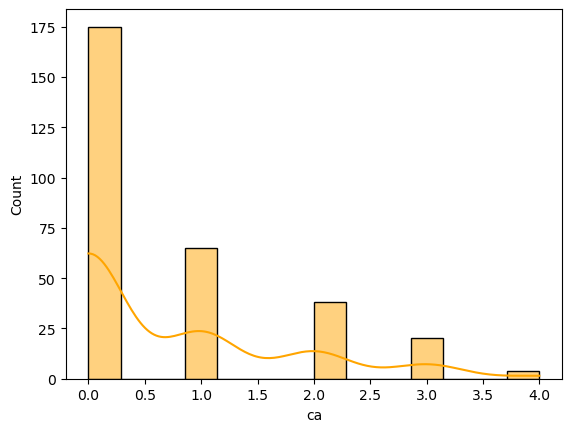

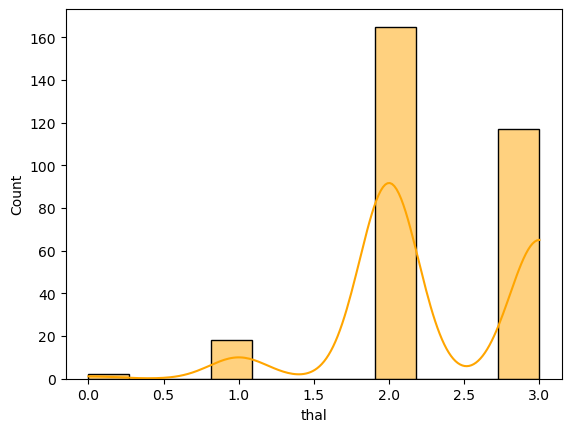

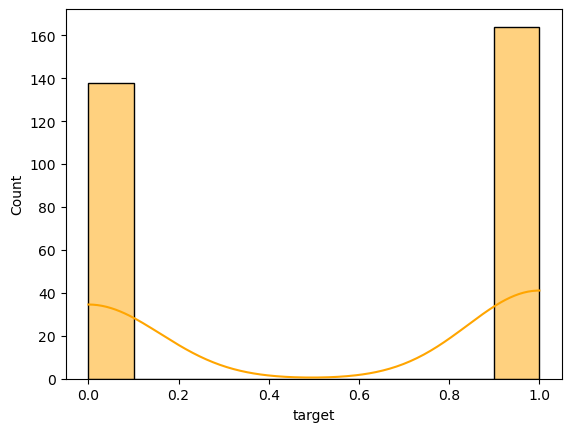

In [9]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.histplot(data, x=data[column], kde=True, color="orange")
        plt.show()

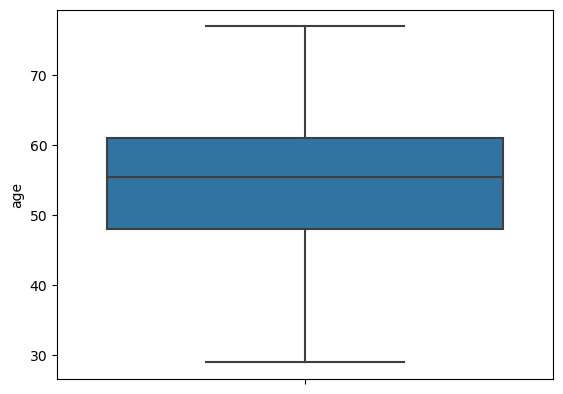

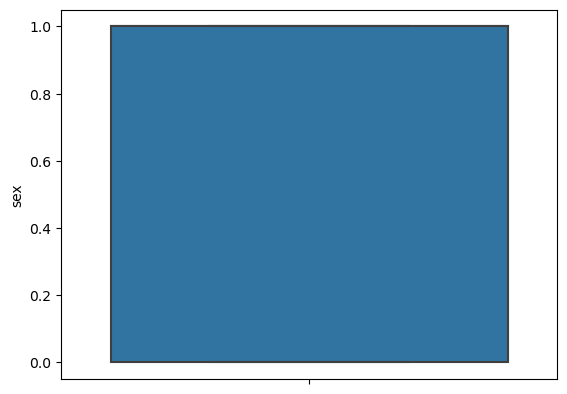

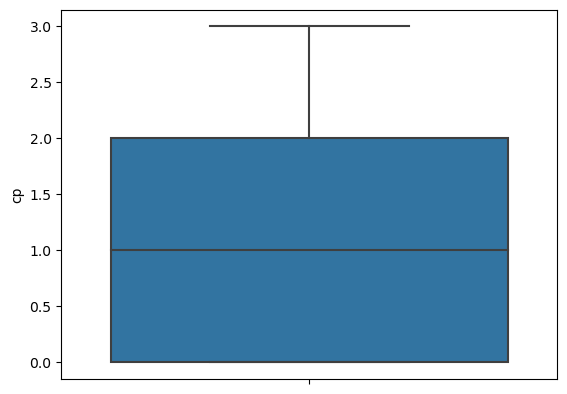

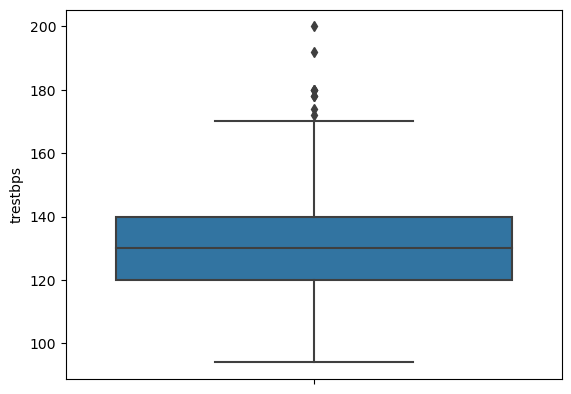

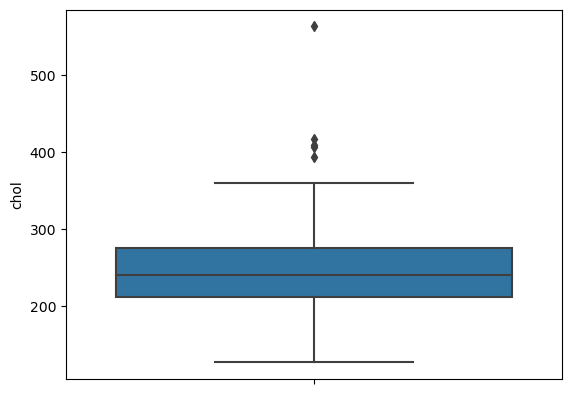

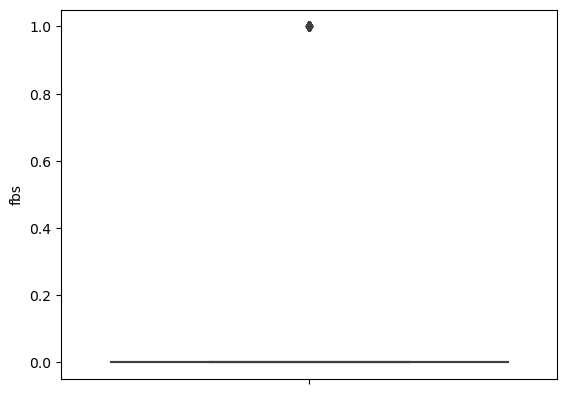

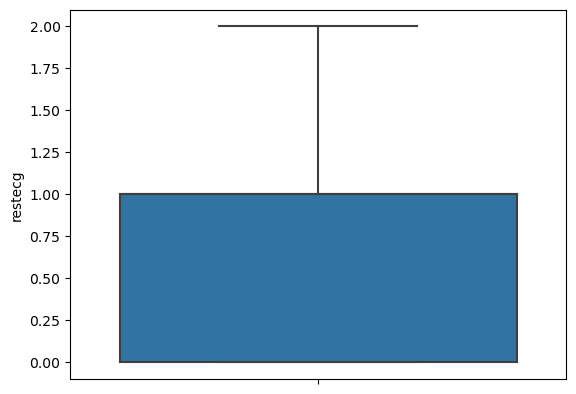

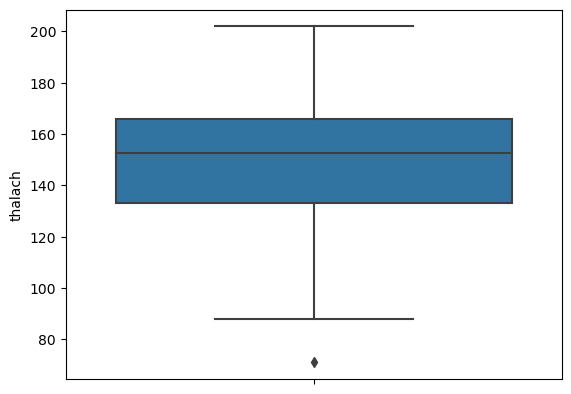

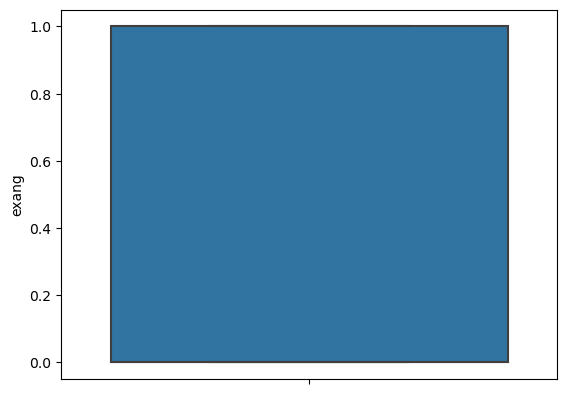

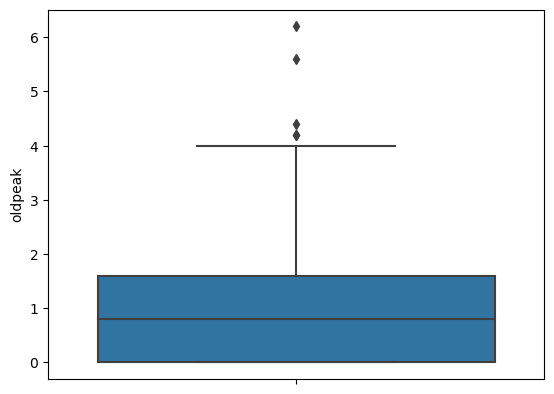

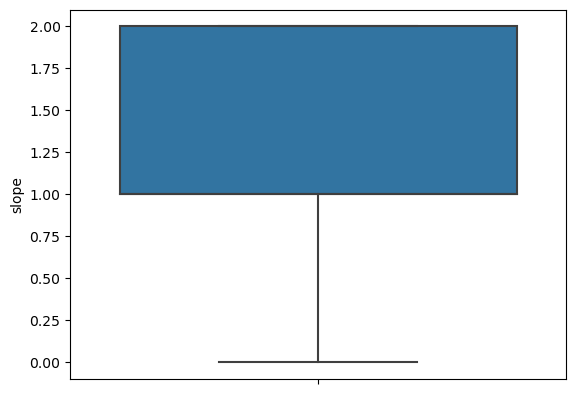

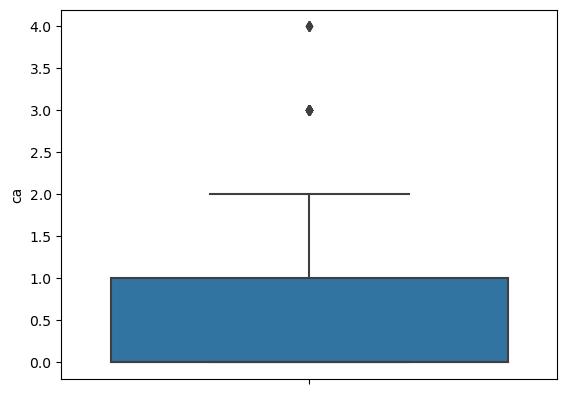

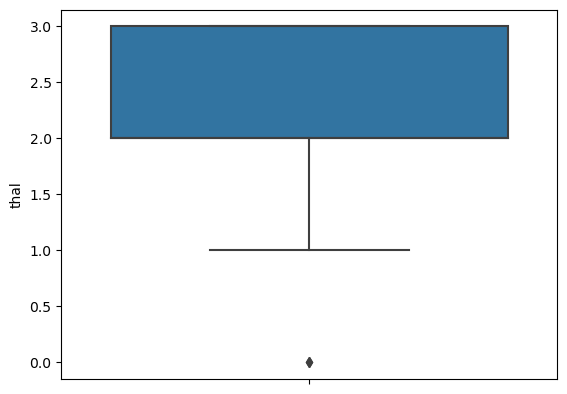

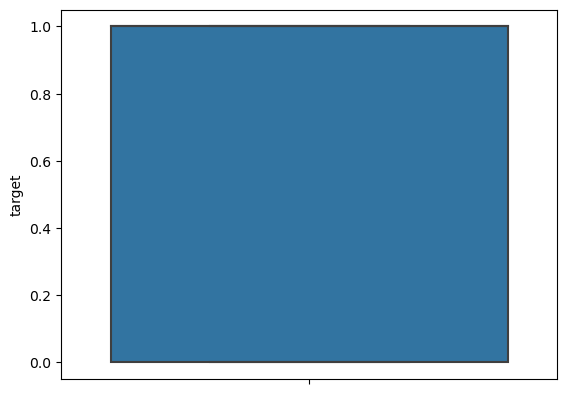

In [10]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column])
        plt.show()

In [11]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

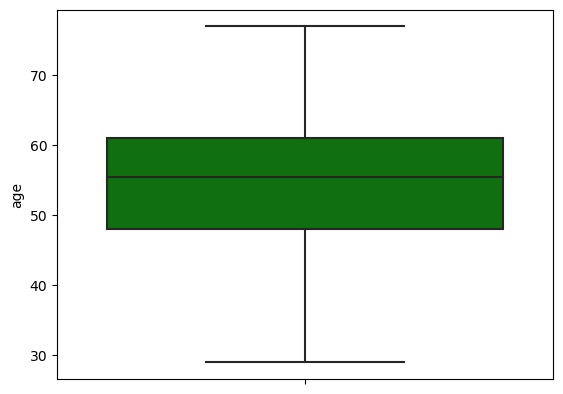

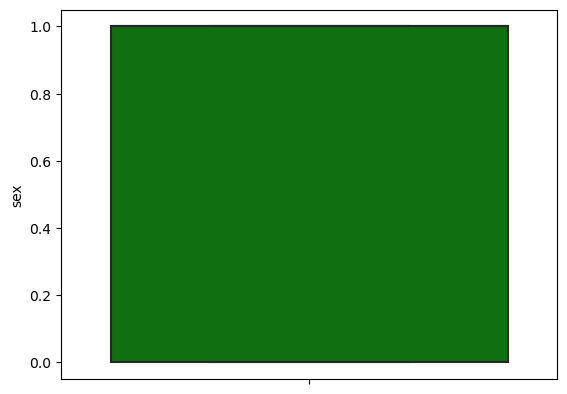

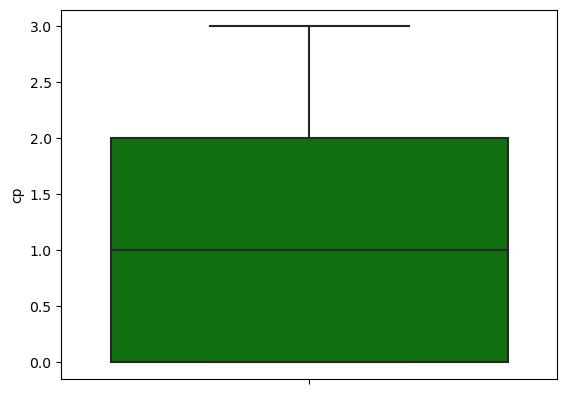

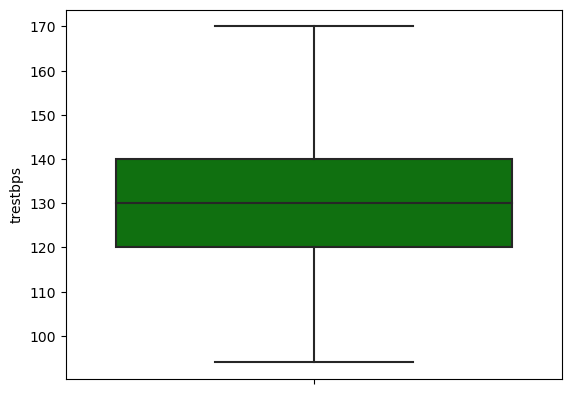

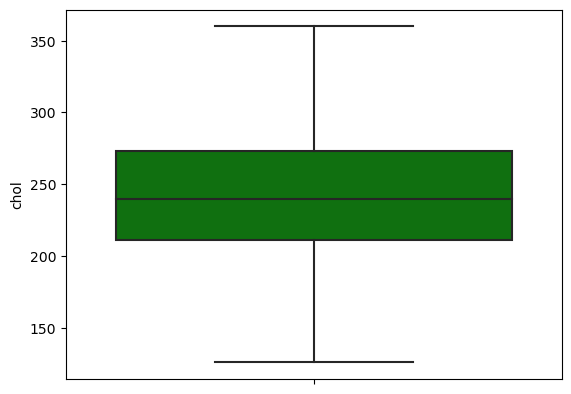

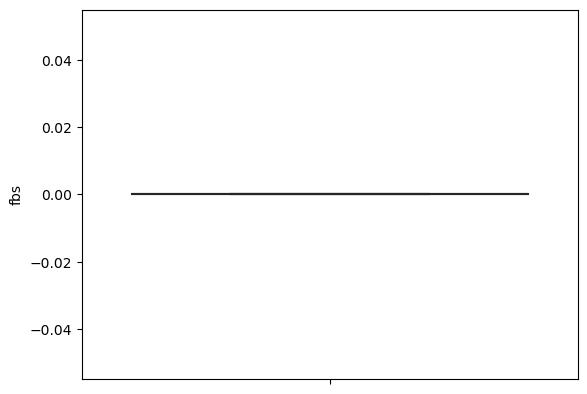

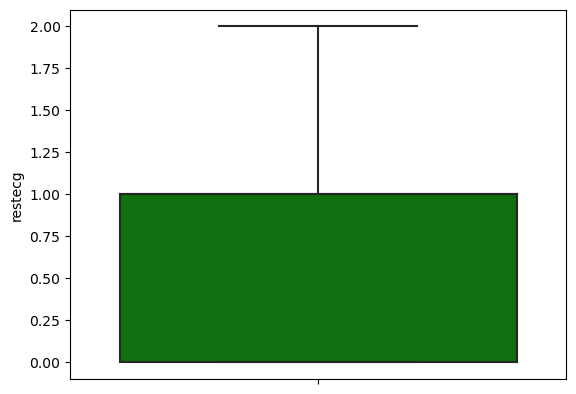

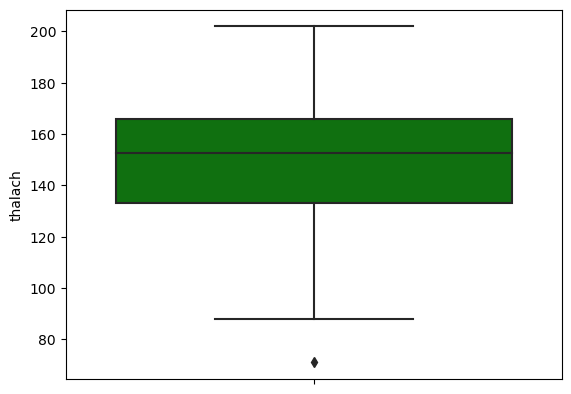

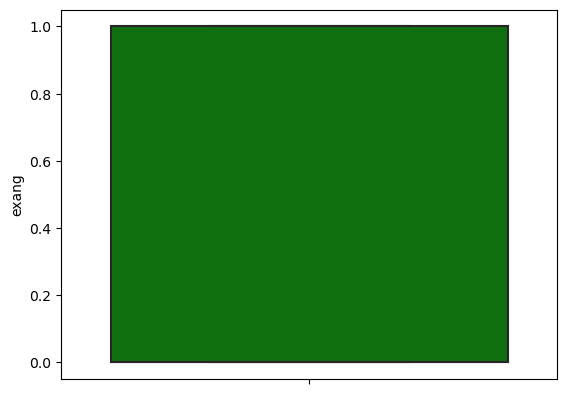

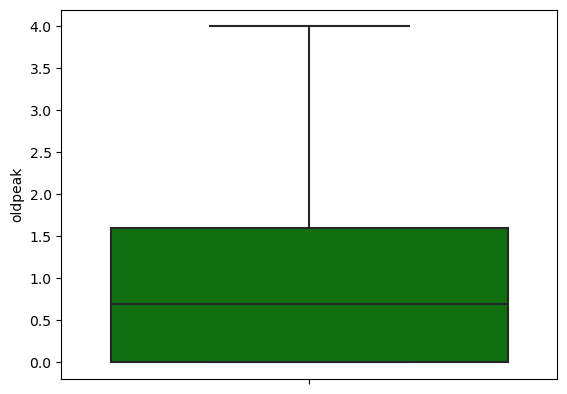

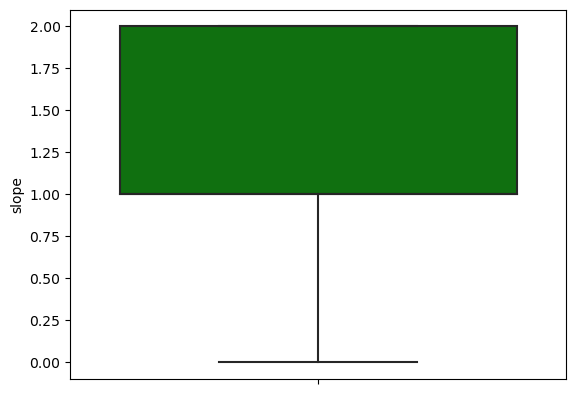

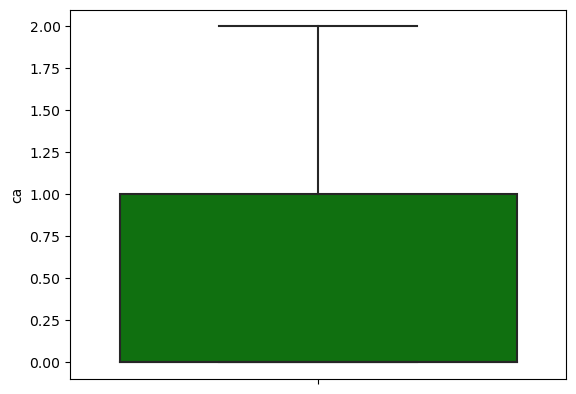

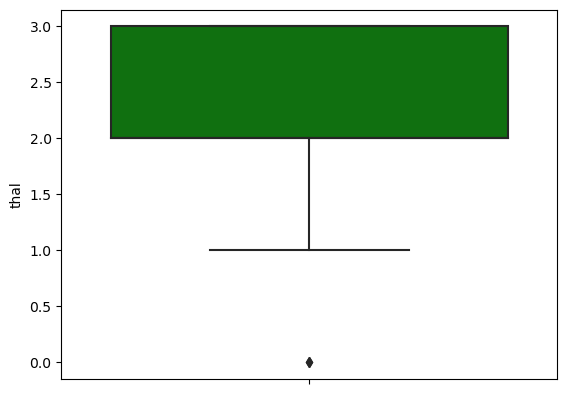

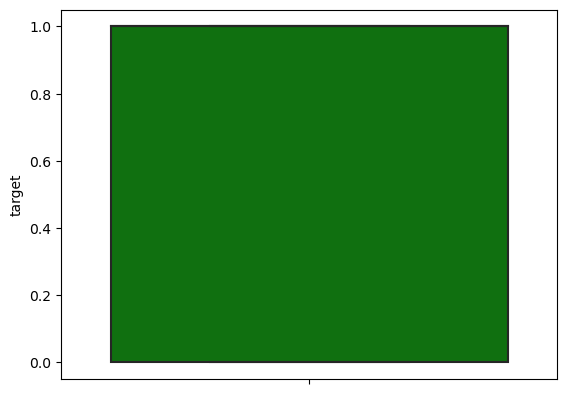

In [12]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column], color="green")
        plt.show()
        

In [13]:
data.dropna(inplace=True)

#### MULTY VARIATE ANALYSIS

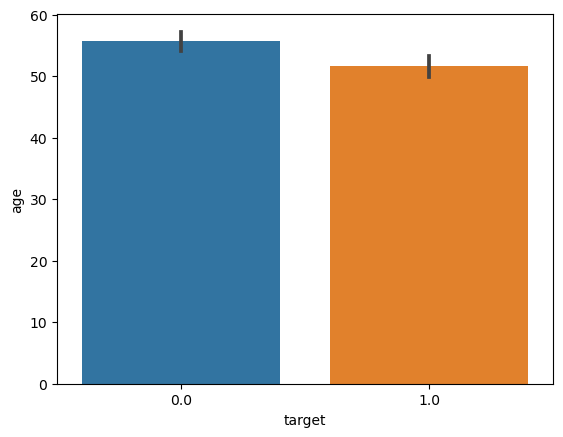

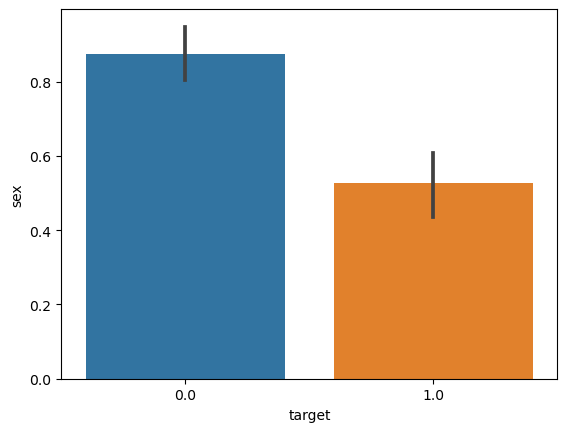

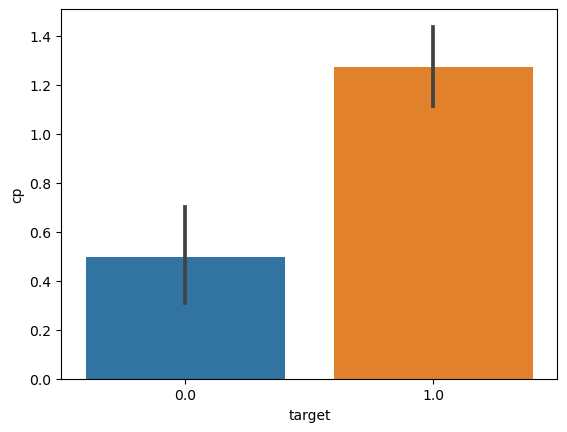

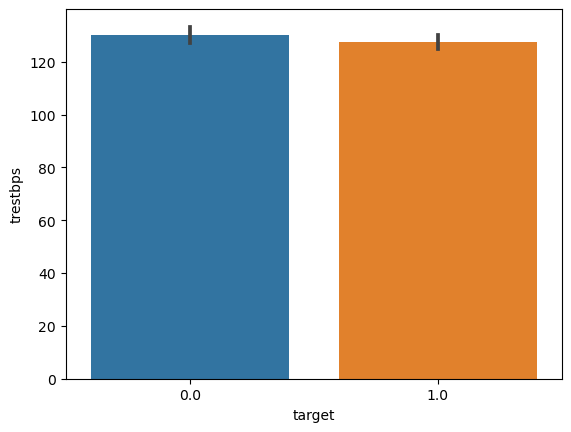

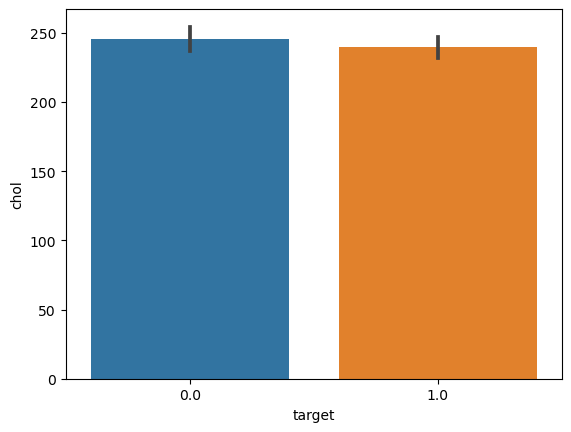

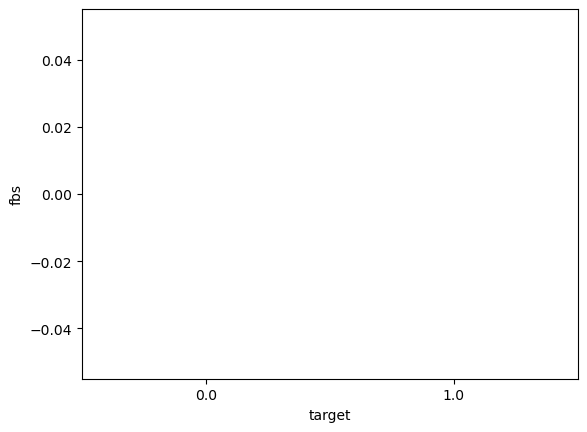

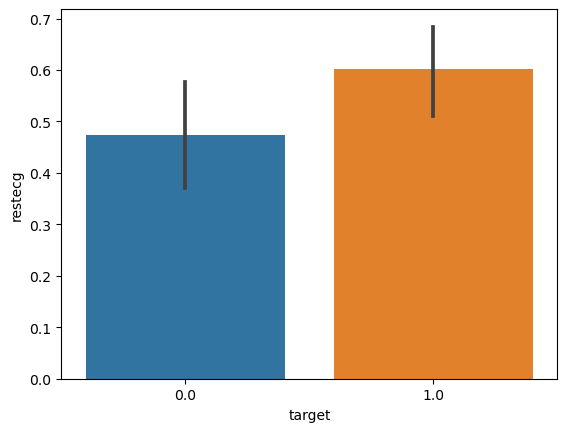

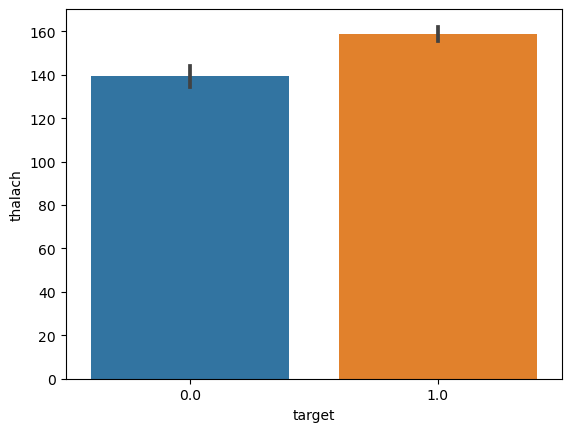

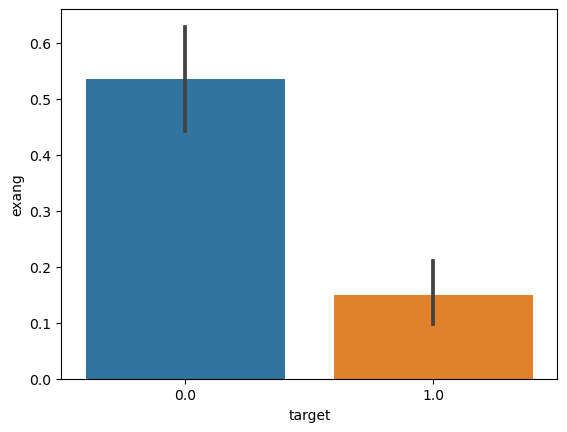

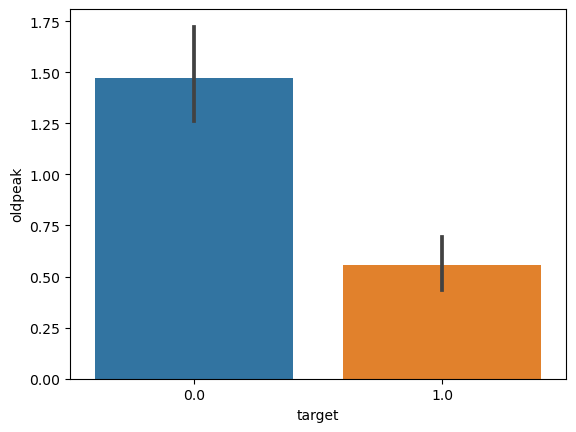

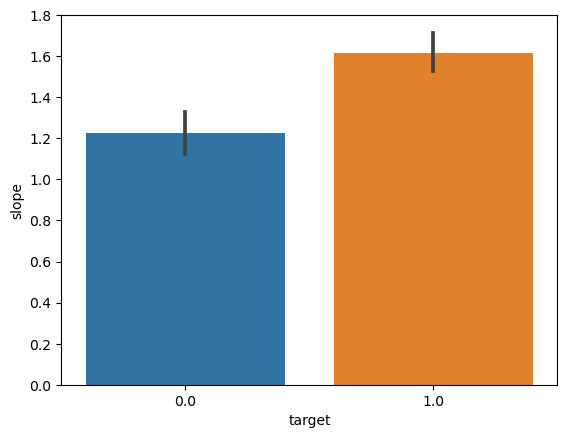

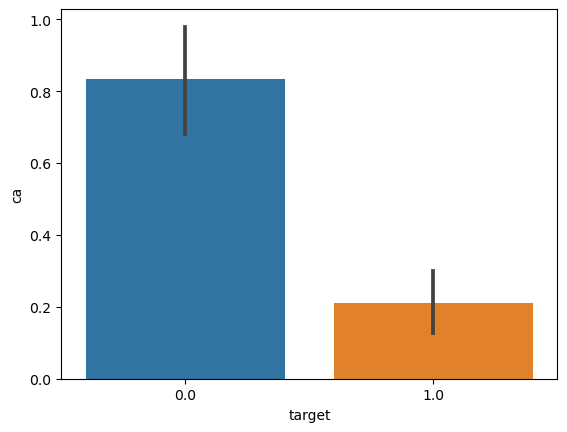

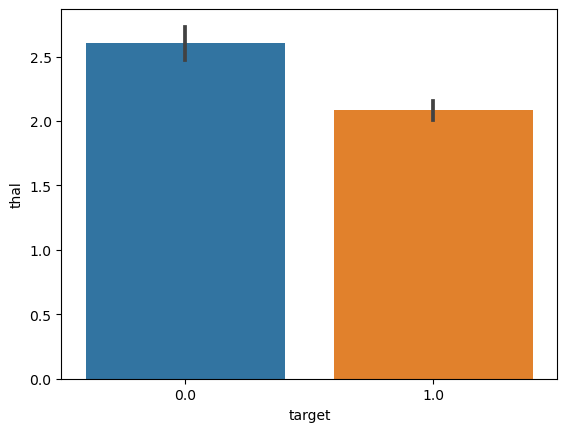

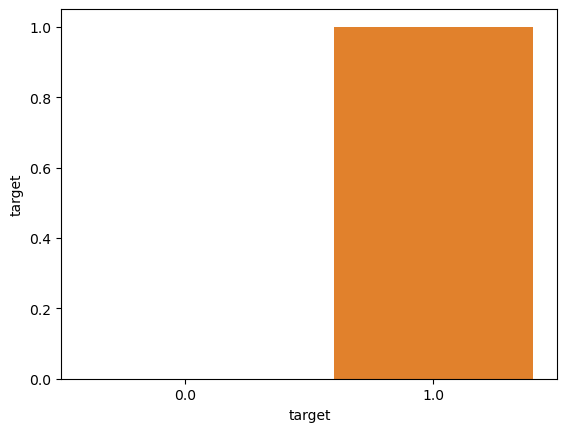

In [14]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.barplot(x='target',y=i,data=data)
        plt.show()

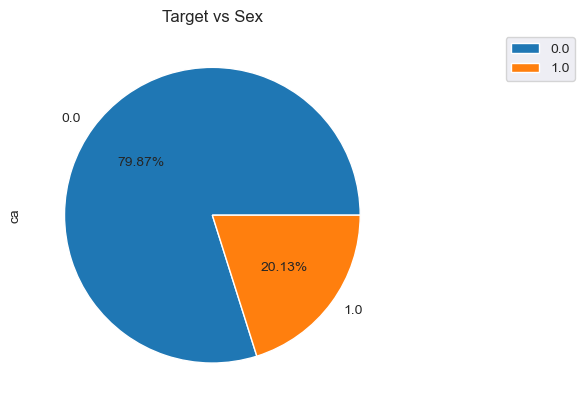

In [40]:
target_sex=data.groupby(['target']) ['ca'].mean()
target_sex.plot.pie(autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1.5,1))
plt.title('Target vs Sex')
plt.show()

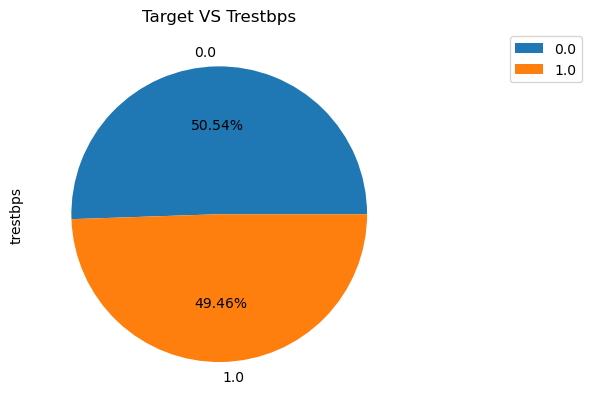

In [17]:
x=data.groupby(['target']) ['trestbps'].mean()
x.plot.pie(autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1.5,1))
plt.title('Target VS Trestbps')
plt.show()

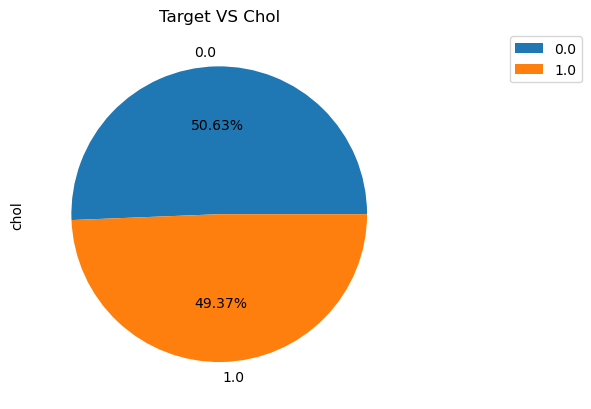

In [18]:
x=data.groupby(['target']) ['chol'].mean()
x.plot.pie(autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1.5,1))
plt.title('Target VS Chol')
plt.show()

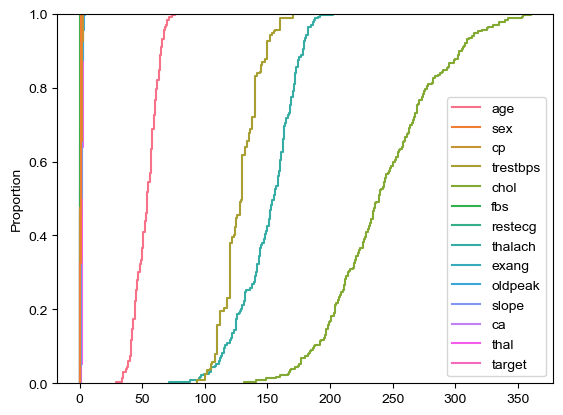

In [19]:
sns.ecdfplot(data=data)
sns.set_style('dark')
plt.show()


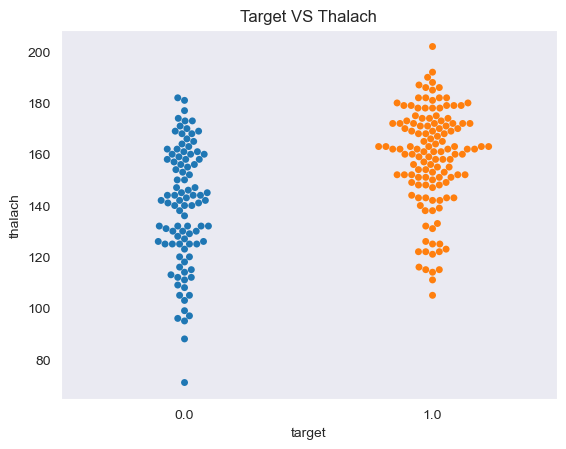

In [20]:
sns.swarmplot(x='target',y='thalach',data=data)
plt.title('Target VS Thalach')
plt.show()

Text(0.5, 1.0, 'Target VS Oldpeak')

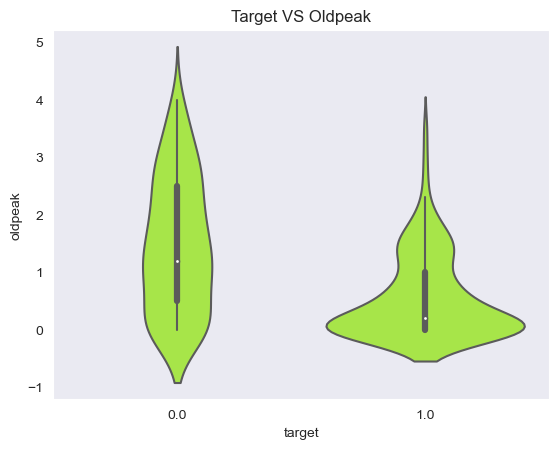

In [21]:
sns.violinplot(x='target',y='oldpeak',data=data,color="greenyellow")
plt.title('Target VS Oldpeak')

### Scaling using Staandardscaler

In [22]:
sc=StandardScaler()

In [23]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Cross validation

In [24]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}

In [25]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=20,n_jobs=-1)
    print("cross validation model : {}".format(name))
    average_score = np.mean(scores)*100
    print("AVERAGE SCORE: ",average_score)
    print("*"*100)

cross validation model : LogisticRegression
AVERAGE SCORE:  86.40151515151514
****************************************************************************************************
cross validation model : DecisionTreeClassifier
AVERAGE SCORE:  76.40151515151516
****************************************************************************************************
cross validation model : RandomForestClassifier
AVERAGE SCORE:  82.4621212121212
****************************************************************************************************
cross validation model : KNeighborsClassifier
AVERAGE SCORE:  63.787878787878796
****************************************************************************************************
cross validation model : GradientBoostingClassifier
AVERAGE SCORE:  81.06060606060606
****************************************************************************************************


### Lets proceed with Logistic regression

In [26]:
model= GradientBoostingClassifier()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

model trained with GradientBoostingClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.8260869565217391
confusion_matrix train is::  [[ 76   0]
 [  0 108]]
confusion_matrix test is::  [[15  6]
 [ 2 23]]
Wrong Predictions made: 8 / 46


### ROC curve

Model used is::  GradientBoostingClassifier()


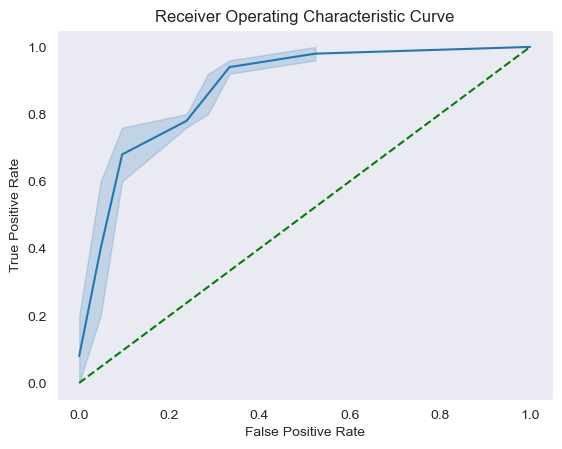

In [29]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()